In [41]:
#Imports

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
#Loadin the data
data_train = np.load('fashion_train.npy').astype(np.int8)
X_train = data_train[:, :-1].reshape(10000, 28, 28)
y_train = data_train[:, -1]

data_test = np.load('fashion_test.npy').astype(np.int8)
X_test = data_test[:, :-1].reshape(5000, 28, 28)
y_test = data_test[:, -1]

In [43]:
#Convolutional layers

model = models.Sequential()
model.add(layers.Conv2D(28, (4, 4), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))

c:\Users\pauls\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
#FF layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [45]:
#Compiling the model (choosing an optimizer, estabilshing a loss function, metrics)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [46]:
#Fitting the model

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5530 - loss: 1.4680 - val_accuracy: 0.7138 - val_loss: 0.7230
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7487 - loss: 0.6391 - val_accuracy: 0.7628 - val_loss: 0.6277
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7847 - loss: 0.5367 - val_accuracy: 0.7646 - val_loss: 0.6070
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8195 - loss: 0.4693 - val_accuracy: 0.7874 - val_loss: 0.5611
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8355 - loss: 0.4271 - val_accuracy: 0.7890 - val_loss: 0.5516
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8489 - loss: 0.3801 - val_accuracy: 0.7728 - val_loss: 0.6061
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8523 - loss: 0.3611 - val_accuracy: 0.7860 - val_loss: 0.6120
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8815 - loss: 0.3106 - val_accuracy: 0.

<function matplotlib.pyplot.draw() -> 'None'>

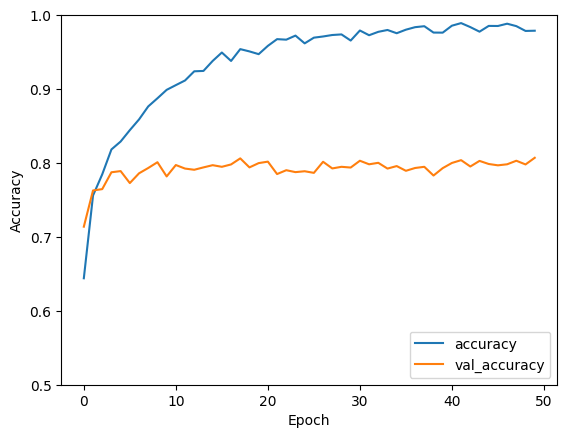

In [47]:
#Plotting the performance of the CNN

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.draw


In [48]:
#Evaluating the classifier
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

157/157 - 0s - 2ms/step - accuracy: 0.8070 - loss: 1.3950


In [57]:


# for i in range(len(y_predict)):
#     y_predict[i] = model.predict(X_test[i,:])

X_test = X_test.reshape(5000, 28, 28, 1)

logits = model.predict(X_test)

y_predict = np.argmax(logits, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [58]:
print(test_acc)

0.8069999814033508


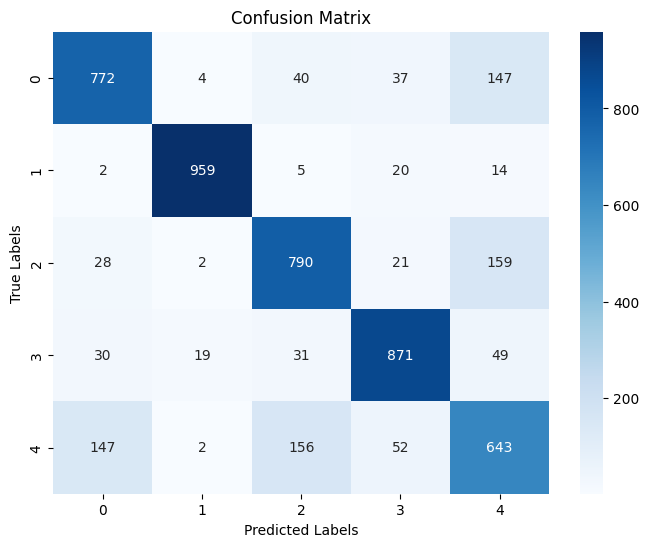

array([[772,   4,  40,  37, 147],
       [  2, 959,   5,  20,  14],
       [ 28,   2, 790,  21, 159],
       [ 30,  19,  31, 871,  49],
       [147,   2, 156,  52, 643]], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
    
    # Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

cm 

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test contains true labels and y_pred contains predicted labels
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')  # or 'macro'
recall = recall_score(y_test, y_predict, average='weighted')        # or 'macro'

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8070
Precision: 0.8079
Recall: 0.8070
